## 신용카드 사용자 연체 예측 AI 경진대회

### 데이터 변수
 - gender: 성별
 - car: 차량 소유 여부
 - reality : 부동산 소유 여부
 - child num: 자녀 수
 - income_total : 연간 소득
 - income_type : 소득 분류=> ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
 - edu_type : 교육 수준 => ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
 - family_type: 결혼 여부 => ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
 - house_type: 생활방식 => ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']
 - day_birth: 출생일 =>-1은 데이터 수집일 하루 전 출생,데이터수집당시 0으로부터 역으로 셈(하루단위)
 - day_employed: 업무 시작일. 하루단위로 계산. 양수는 고용x
 - flag_mobil: 휴대폰 소유 여부
 - work_phone: 업무용 전화 소유 여부
 - phone: 전화 소유 여부
 - email: 이메일 소유 여부
 - occyp_type: 직업 유형
 - family_size: 가족 규모
 - begin_month: 신용카드 발급월

종속변수 (credit) : 사용자의 신용카드 대금 연체를 기준으로 한 신용도. 낮을수록 높은 신용의 신용카드 사용자를 의미

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import plot_importance,XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submit=pd.read_csv('sample_submission.csv')
df_train=train.copy()
df_test=test.copy()

In [3]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [5]:
print(train.shape,test.shape)

(26457, 20) (10000, 19)


In [6]:
train.info() #occyp_type만 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
index            26457 non-null int64
gender           26457 non-null object
car              26457 non-null object
reality          26457 non-null object
child_num        26457 non-null int64
income_total     26457 non-null float64
income_type      26457 non-null object
edu_type         26457 non-null object
family_type      26457 non-null object
house_type       26457 non-null object
DAYS_BIRTH       26457 non-null int64
DAYS_EMPLOYED    26457 non-null int64
FLAG_MOBIL       26457 non-null int64
work_phone       26457 non-null int64
phone            26457 non-null int64
email            26457 non-null int64
occyp_type       18286 non-null object
family_size      26457 non-null float64
begin_month      26457 non-null float64
credit           26457 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 4.0+ MB


### 결측치 확인

In [7]:
#결측치 제거
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

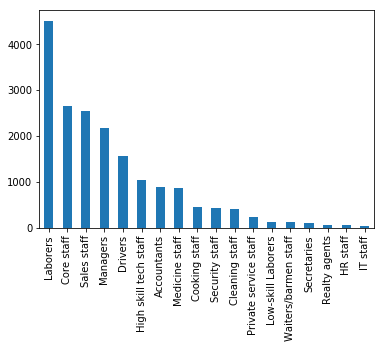

In [8]:
train['occyp_type'].value_counts().plot(kind='bar')
#laborers가 많은 편. core staff, sales staff,managers,drivers 순으로 나타남
#노동자들이 많은 타입

In [9]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

## EDA

### 결측치 분석

In [10]:
non_occyp=df_train.loc[df_train['occyp_type'].isnull()]#직업유형이 없는 사람
occyp=df_train.dropna()#직업유형이 있는 사람(결측치 제거)

In [11]:
non_occyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8171 entries, 0 to 26453
Data columns (total 20 columns):
index            8171 non-null int64
gender           8171 non-null object
car              8171 non-null object
reality          8171 non-null object
child_num        8171 non-null int64
income_total     8171 non-null float64
income_type      8171 non-null object
edu_type         8171 non-null object
family_type      8171 non-null object
house_type       8171 non-null object
DAYS_BIRTH       8171 non-null int64
DAYS_EMPLOYED    8171 non-null int64
FLAG_MOBIL       8171 non-null int64
work_phone       8171 non-null int64
phone            8171 non-null int64
email            8171 non-null int64
occyp_type       0 non-null object
family_size      8171 non-null float64
begin_month      8171 non-null float64
credit           8171 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 1.3+ MB


In [12]:
non_occyp.head() #occyp_type이 없는 사람

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0


In [13]:
occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0


In [14]:
occyp.loc[occyp['DAYS_EMPLOYED']>0]#1이 없음
#전부다 고용된 상태임

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [15]:
non_occyp['DAYS_EMPLOYED'].value_counts()
#양수인 부분이 4438개->고용된 사람과 그렇지 않은 사람이 존재한다.

 365243    4438
-302         25
-1613        21
-2014        21
-3079        21
-5639        20
-1751        20
-137         19
-5521        16
-1315        16
-135         15
-4834        15
-229         14
-2339        14
-3322        14
-2501        14
-15038       14
-2654        13
-1202        13
-170         13
-469         13
-422         13
-7627        13
-3458        12
-1160        12
-1113        12
-3668        12
-901         12
-4943        12
-2065        12
           ... 
-4089         1
-7953         1
-5910         1
-1844         1
-3592         1
-2074         1
-3935         1
-1892         1
-1904         1
-3967         1
-3999         1
-5866         1
-3604         1
-184          1
-5754         1
-5706         1
-1620         1
-1640         1
-1644         1
-1648         1
-1656         1
-917          1
-2870         1
-1680         1
-7738         1
-873          1
-4029         1
-825          1
-3608         1
-2051         1
Name: DAYS_EMPLOYED, Len

In [16]:
non_occyp['employeed']=[1 if t<0 else 0 for t in list(non_occyp['DAYS_EMPLOYED'])]

In [17]:
non_occyp.head()#양수면 0,음수면 1

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,1
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-37.0,2.0,0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,1


In [18]:
occyp['employeed']=1

In [19]:
occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0,1


결측치에 해당하는 값을 조사한 결과 고용이 안 된 사람과 된 사람 모두 포함되지만 결측값이 없는 상태는 모두 고용이 된 사람들이다.

In [20]:
#결측값 중 고용된 사람 중에서 소득분류 분포
non_occyp.loc[non_occyp['employeed']==1]['income_type'].value_counts()

Working                 2312
Commercial associate    1026
State servant            392
Pensioner                  2
Student                    1
Name: income_type, dtype: int64

일하는 사람은 2312,상업 제휴를 하는 사람은 1026,공무원은 392,학생은 1명,연금수령자는 2명(2명은 정년퇴직?)

In [21]:
non_occyp.loc[non_occyp['DAYS_EMPLOYED']>=0]['income_type'].value_counts()
#고용되지 않은 사람 중에는 연금을 수령한 사람들이다.

Pensioner    4438
Name: income_type, dtype: int64

In [22]:
print(occyp.shape,non_occyp.shape)

(18286, 21) (8171, 21)


In [23]:
non_occyp.loc[(non_occyp['employeed']==0)] #4438개,고용되지 않은 사람 수

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-37.0,2.0,0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-7.0,2.0,0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-5.0,2.0,0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,1,0,NaN,1.0,-24.0,2.0,0
48,48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-4.0,2.0,0
52,52,F,N,Y,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-37.0,2.0,0
58,58,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-23.0,2.0,0
59,59,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-25.0,2.0,0
60,60,M,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-1.0,1.0,0


In [24]:
non_occyp.loc[(non_occyp['employeed']==0),'occyp_type']='inocc'
#고용되지 않은 사람은 inocc로 처리.

In [25]:
non_occyp.loc[(non_occyp['employeed']==0),'DAYS_EMPLOYED']=0

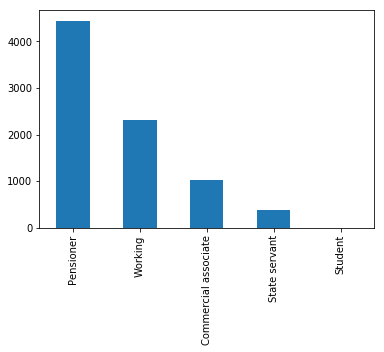

In [26]:
non_occyp['income_type'].value_counts().plot(kind='bar')
#결측치가 들어간 데이터 내 소득 분류는 연금을 받은 사람들이 많다.

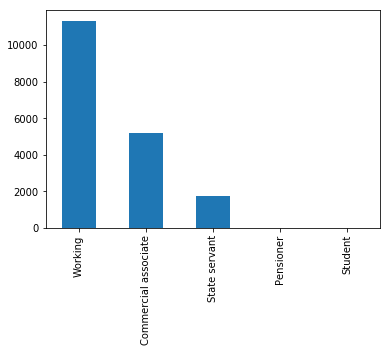

In [27]:
occyp['income_type'].value_counts().plot(kind='bar')
#역시 연금을 받은 사람이 많다.

In [28]:
non_occyp.loc[non_occyp['income_type']=='Pensioner']
#연금을 받는 사람들 대상으로 조사 결과 income_total은 결측치가 없다

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,1,0,inocc,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,inocc,2.0,-37.0,2.0,0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,inocc,2.0,-7.0,2.0,0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,1,0,inocc,1.0,-5.0,2.0,0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,1,0,inocc,1.0,-24.0,2.0,0
48,48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,inocc,2.0,-4.0,2.0,0
52,52,F,N,Y,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,inocc,2.0,-37.0,2.0,0
58,58,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,inocc,2.0,-23.0,2.0,0
59,59,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,1,0,inocc,2.0,-25.0,2.0,0
60,60,M,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,inocc,1.0,-1.0,1.0,0


In [29]:
non_occyp.isnull().sum() #3733개 남음

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3733
family_size         0
begin_month         0
credit              0
employeed           0
dtype: int64

In [30]:
non_occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,1
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,1,0,inocc,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,inocc,2.0,-37.0,2.0,0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,1


In [31]:
occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0,1


### regression

In [32]:
data=pd.concat([occyp,non_occyp])

In [33]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0,1


In [34]:
#명목형 변수 라벨화
label_encoder=preprocessing.LabelEncoder()
data['gender'] = data['gender'].replace(['F','M'],[0,1])
data['car'] = data['car'].replace(['N','Y'],[0,1])
data['reality'] = data['reality'].replace(['N','Y'],[0,1])
data['income_type']=label_encoder.fit_transform(data['income_type'])
#################################################################
data['edu_type']=label_encoder.fit_transform(data['edu_type'])
########################################################################
data['family_type']=label_encoder.fit_transform(data['family_type'])
########################################################################
data['house_type']=label_encoder.fit_transform(data['house_type'])
########################################################################

In [35]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
1,1,0,0,1,1,247500.0,0,4,0,1,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,1,1,1,0,450000.0,4,1,1,1,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,0,0,1,0,202500.0,0,4,1,1,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,0,1,1,0,157500.0,2,1,1,1,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1
5,5,0,0,1,2,270000.0,4,4,1,1,...,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0,1


In [36]:
null_data=data.loc[data['occyp_type'].isnull()]

In [37]:
null_data.head()#inocc 대체 후 결측치가 있는 것들

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,0,0,0,0,202500.0,0,1,1,2,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
8,8,1,1,1,1,180000.0,0,1,1,1,...,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,1
19,19,0,0,1,0,180000.0,4,4,1,1,...,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,1
20,20,1,0,0,0,180000.0,4,4,1,1,...,-1753,1,0,1,0,NaN,2.0,-35.0,2.0,1
23,23,1,1,0,0,225000.0,4,4,1,2,...,-444,1,1,1,1,NaN,2.0,-18.0,2.0,1


In [38]:
data.shape

(26457, 21)

In [39]:
fill_data=data.dropna() #결측치 제거한 데이터

In [40]:
print(fill_data.shape,null_data.shape)

(22724, 21) (3733, 21)


In [41]:
fill_data['occyp_type_l']=label_encoder.fit_transform(fill_data['occyp_type'])
#결측치 없는 데이터 중 occyp_type를 라벨링한 변수를 추가(라벨링과 원래값 비교를 위해)

In [42]:
fill_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,occyp_type_l
1,1,0,0,1,1,247500.0,0,4,0,1,...,1,0,0,1,Laborers,3.0,-5.0,1.0,1,8
2,2,1,1,1,0,450000.0,4,1,1,1,...,1,0,1,0,Managers,2.0,-22.0,2.0,1,10
3,3,0,0,1,0,202500.0,0,4,1,1,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,1,14
4,4,0,1,1,0,157500.0,2,1,1,1,...,1,0,0,0,Managers,2.0,-26.0,2.0,1,10
5,5,0,0,1,2,270000.0,4,4,1,1,...,1,0,0,1,High skill tech staff,4.0,-18.0,1.0,1,6


In [43]:
fill_data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed',
       'occyp_type_l'],
      dtype='object')

In [44]:
null_data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed'],
      dtype='object')

In [45]:
lin_reg = linear_model.LinearRegression()
x=fill_data[fill_data.columns.drop(['index','occyp_type','credit',
                                   'employeed','occyp_type_l'])]
#employeed(0,1)을 넣지 않고 days_employed에서 양수값을 0으로 처리한 상태에서 재시도
#라벨링한 occyp_type_l는 종속변수로 사용
y=fill_data['occyp_type_l']#라벨링 상태
lin_reg_model = lin_reg.fit(x, y)

In [46]:
x.shape

(22724, 17)

In [47]:
x_test=null_data[null_data.columns.drop(['index','occyp_type','credit','employeed'])]
y_test=null_data['occyp_type']
y_test=lin_reg.predict(x_test)#결측치가 있는 데이터에 대입

In [48]:
null_data['occyp_type']=y_test

In [49]:
null_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,0,0,0,0,202500.0,0,1,1,2,...,-4709,1,0,0,0,7.789922,2.0,-6.0,1.0,1
8,8,1,1,1,1,180000.0,0,1,1,1,...,-1466,1,0,0,1,8.832769,3.0,-38.0,2.0,1
19,19,0,0,1,0,180000.0,4,4,1,1,...,-6031,1,0,0,0,6.110326,2.0,-7.0,2.0,1
20,20,1,0,0,0,180000.0,4,4,1,1,...,-1753,1,0,1,0,11.776212,2.0,-35.0,2.0,1
23,23,1,1,0,0,225000.0,4,4,1,2,...,-444,1,1,1,1,7.800152,2.0,-18.0,2.0,1


In [50]:
null_data.shape

(3733, 21)

In [51]:
null_data['occyp_type'].value_counts() 

6.700081     4
5.421080     4
9.070744     3
8.439904     3
7.718376     3
11.402574    3
10.948696    3
10.239545    3
5.566249     3
5.806243     3
9.708101     3
5.562085     3
11.094643    3
9.737606     3
11.195717    3
3.110578     3
6.793299     3
6.259562     3
10.643064    3
12.333151    3
6.411830     3
5.677078     3
5.667152     3
6.600869     3
7.514427     3
6.386043     3
7.195056     3
3.093324     3
8.151593     3
8.115841     2
            ..
6.234998     1
6.637751     1
8.903048     1
6.076978     1
10.443665    1
5.650953     1
7.301871     1
7.536923     1
12.083631    1
9.109007     1
8.114869     1
5.543142     1
8.893868     1
12.290502    1
8.382629     1
5.089767     1
5.819519     1
13.502996    1
5.379099     1
5.553197     1
9.942124     1
8.211799     1
5.237153     1
8.557176     1
5.908814     1
3.896433     1
8.978194     1
5.254968     1
7.556375     1
6.156196     1
Name: occyp_type, Length: 3357, dtype: int64

In [52]:
print(y[:10]) 

1      8
2     10
3     14
4     10
5      6
6      3
7      4
9     11
10     8
11    10
Name: occyp_type_l, dtype: int32


In [53]:
fill_data['occyp_type'].value_counts()

Laborers                 4512
inocc                    4438
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [54]:
#fill_data['occyp_type_enc']=y_encoded
fill_data['occyp_type_l'].value_counts()

8     4512
18    4438
3     2646
14    2539
10    2167
4     1575
6     1040
0      902
11     864
2      457
16     424
1      403
12     243
9      127
17     124
15      97
13      63
5       62
7       41
Name: occyp_type_l, dtype: int64

In [55]:
fill_data['occyp_type_l'].unique()#라벨링값

array([ 8, 10, 14,  6,  3,  4, 11,  0, 13, 16,  1, 12,  2, 15,  5,  7,  9,
       17, 18], dtype=int64)

In [56]:
fill_data['occyp_type'].unique()#라벨링값 순서대로 8:Laborers,10:Managers,...

array(['Laborers', 'Managers', 'Sales staff', 'High skill tech staff',
       'Core staff', 'Drivers', 'Medicine staff', 'Accountants',
       'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'inocc'], dtype=object)

In [57]:
np.round(y_test,0)

array([8., 9., 6., ..., 7., 7., 8.])

In [58]:
null_data['occyp_type']=np.round(null_data['occyp_type'],0)#반올림

In [59]:
null_data['occyp_type'].describe()

count    3733.000000
mean        8.293598
std         2.371466
min         2.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        16.000000
Name: occyp_type, dtype: float64

In [60]:
null_data['occyp_type'].value_counts()

8.0     602
6.0     552
9.0     542
7.0     525
10.0    400
11.0    391
5.0     257
12.0    158
4.0      99
13.0     83
14.0     59
3.0      38
15.0     22
16.0      3
2.0       2
Name: occyp_type, dtype: int64

In [61]:
#라벨링->원래값
null_data.loc[null_data['occyp_type']==2.0,'occyp_type']= 'Cooking staff'
null_data.loc[null_data['occyp_type']==3.0,'occyp_type']='Core staff'
null_data.loc[null_data['occyp_type']==4.0,'occyp_type']='Drivers'
null_data.loc[null_data['occyp_type']==5.0,'occyp_type']='HR staff'
null_data.loc[null_data['occyp_type']==6.0,'occyp_type']='High skill tech staff'
null_data.loc[null_data['occyp_type']==7.0,'occyp_type']='IT staff'
null_data.loc[null_data['occyp_type']==8.0,'occyp_type']='Laborers'
null_data.loc[null_data['occyp_type']==9.0,'occyp_type']='Low-skill Laborers'
null_data.loc[null_data['occyp_type']==10.0,'occyp_type']='Managers'
null_data.loc[null_data['occyp_type']==11.0,'occyp_type']='Medicine staff'
null_data.loc[null_data['occyp_type']==12.0,'occyp_type']='Private service staff'
null_data.loc[null_data['occyp_type']==13.0,'occyp_type']='Realty agents'
null_data.loc[null_data['occyp_type']==14.0,'occyp_type']='Sales staff'
null_data.loc[null_data['occyp_type']==15.0,'occyp_type']='Secretaries'

In [62]:
null_data.loc[null_data['occyp_type']==16.0,'occyp_type']='Security staff'

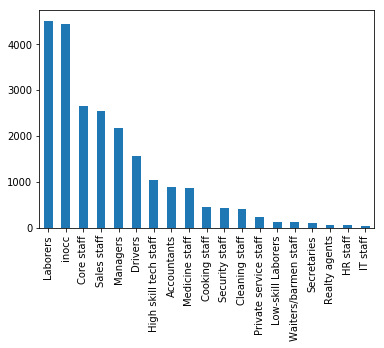

In [63]:
fill_data['occyp_type'].value_counts().plot(kind='bar')

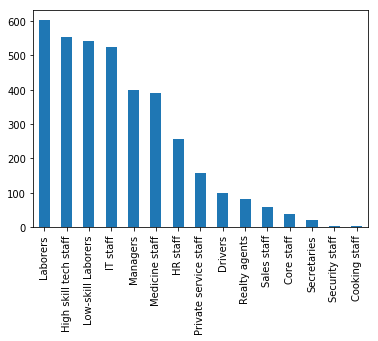

In [64]:
null_data['occyp_type'].value_counts().plot(kind='bar')

In [65]:
null_data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed'],
      dtype='object')

In [66]:
fill_data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed',
       'occyp_type_l'],
      dtype='object')

In [67]:
fill_data=fill_data.drop('occyp_type_l',axis=1)

In [68]:
df=pd.concat([null_data,fill_data]).sort_values(by='index')
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,0,0,0,0,202500.0,0,1,1,2,...,-4709,1,0,0,0,Laborers,2.0,-6.0,1.0,1
1,1,0,0,1,1,247500.0,0,4,0,1,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,1,1,1,0,450000.0,4,1,1,1,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,0,0,1,0,202500.0,0,4,1,1,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,0,1,1,0,157500.0,2,1,1,1,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1


In [69]:
null_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,0,0,0,0,202500.0,0,1,1,2,...,-4709,1,0,0,0,Laborers,2.0,-6.0,1.0,1
8,8,1,1,1,1,180000.0,0,1,1,1,...,-1466,1,0,0,1,Low-skill Laborers,3.0,-38.0,2.0,1
19,19,0,0,1,0,180000.0,4,4,1,1,...,-6031,1,0,0,0,High skill tech staff,2.0,-7.0,2.0,1
20,20,1,0,0,0,180000.0,4,4,1,1,...,-1753,1,0,1,0,Private service staff,2.0,-35.0,2.0,1
23,23,1,1,0,0,225000.0,4,4,1,2,...,-444,1,1,1,1,Laborers,2.0,-18.0,2.0,1


### test파일 전처리

In [70]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
index            10000 non-null int64
gender           10000 non-null object
car              10000 non-null object
reality          10000 non-null object
child_num        10000 non-null int64
income_total     10000 non-null float64
income_type      10000 non-null object
edu_type         10000 non-null object
family_type      10000 non-null object
house_type       10000 non-null object
DAYS_BIRTH       10000 non-null int64
DAYS_EMPLOYED    10000 non-null int64
FLAG_MOBIL       10000 non-null int64
work_phone       10000 non-null int64
phone            10000 non-null int64
email            10000 non-null int64
occyp_type       6848 non-null object
family_size      10000 non-null float64
begin_month      10000 non-null float64
dtypes: float64(3), int64(8), object(8)
memory usage: 1.4+ MB


In [71]:
df_test.isnull().sum() #결측치 3152

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

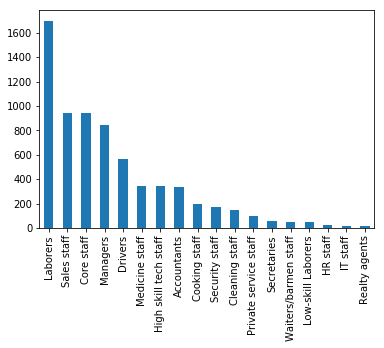

In [72]:
df_test['occyp_type'].value_counts().plot(kind='bar')
#laborers가 많은 편. sales staff,core staff,managers,drivers 순으로 나타남
#노동자들이 많은 타입

In [73]:
df_test['occyp_type'].value_counts()

Laborers                 1699
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
Medicine staff            343
High skill tech staff     343
Accountants               339
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Secretaries                54
Waiters/barmen staff       50
Low-skill Laborers         48
HR staff                   23
IT staff                   19
Realty agents              16
Name: occyp_type, dtype: int64

In [74]:
df_test.loc[df_test['DAYS_EMPLOYED']>0,'DAYS_EMPLOYED']=0

In [75]:
df_non_occyp=df_test.loc[df_test['occyp_type'].isnull()]#직업유형이 없는 사람
df_occyp=df_test.dropna()#직업유형이 있는 사람(결측치 제거)

In [76]:
df_non_occyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 0 to 9998
Data columns (total 19 columns):
index            3152 non-null int64
gender           3152 non-null object
car              3152 non-null object
reality          3152 non-null object
child_num        3152 non-null int64
income_total     3152 non-null float64
income_type      3152 non-null object
edu_type         3152 non-null object
family_type      3152 non-null object
house_type       3152 non-null object
DAYS_BIRTH       3152 non-null int64
DAYS_EMPLOYED    3152 non-null int64
FLAG_MOBIL       3152 non-null int64
work_phone       3152 non-null int64
phone            3152 non-null int64
email            3152 non-null int64
occyp_type       0 non-null object
family_size      3152 non-null float64
begin_month      3152 non-null float64
dtypes: float64(3), int64(8), object(8)
memory usage: 492.5+ KB


In [77]:
df_occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
5,26462,F,Y,Y,0,126000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-18458,-2104,1,0,0,0,Core staff,1.0,-5.0


In [78]:
df_occyp.loc[df_occyp['DAYS_EMPLOYED']>0] #모두 고용된 상태

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month


In [79]:
df_non_occyp['DAYS_EMPLOYED'].value_counts()
#양수인 부분은 이미 0으로 전환

 0       1697
-422        9
-7627       9
-3243       9
-3993       9
-2014       8
-4943       8
-302        8
-7369       7
-1160       7
-2330       7
-2481       7
-1466       7
-5521       7
-137        6
-1661       6
-2057       6
-3668       6
-1202       6
-2908       6
-200        6
-218        6
-857        6
-135        6
-2987       6
-3488       6
-2753       6
-1871       6
-4834       6
-229        5
         ... 
-2268       1
-4335       1
-259        1
-2324       1
-4033       1
-1976       1
-1682       1
-1962       1
-5782       1
-1688       1
-6499       1
-1716       1
-5818       1
-3779       1
-5864       1
-3837       1
-3839       1
-1806       1
-6608       1
-231        1
-1816       1
-5948       1
-3907       1
-3913       1
-3931       1
-3933       1
-4509       1
-8071       1
-1662       1
-4082       1
Name: DAYS_EMPLOYED, Length: 678, dtype: int64

In [80]:
df_non_occyp.loc[df_non_occyp['DAYS_EMPLOYED']!=0]['income_type'].value_counts()
#소득분류 분포(고용된 사람 중)

Working                 885
Commercial associate    412
State servant           156
Pensioner                 2
Name: income_type, dtype: int64

In [81]:
df_non_occyp.loc[df_non_occyp['DAYS_EMPLOYED']==0]['income_type'].value_counts()
#전원 연금을 받는 사람들이다

Pensioner    1697
Name: income_type, dtype: int64

In [82]:
print(df_occyp.shape,df_non_occyp.shape)

(6848, 19) (3152, 19)


In [83]:
df_non_occyp.loc[(df_non_occyp['DAYS_EMPLOYED']==0),'occyp_type']='inocc'

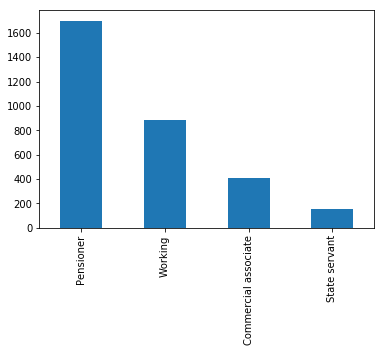

In [84]:
df_non_occyp['income_type'].value_counts().plot(kind='bar')
#결측치가 들어간 데이터 내 소득 분류

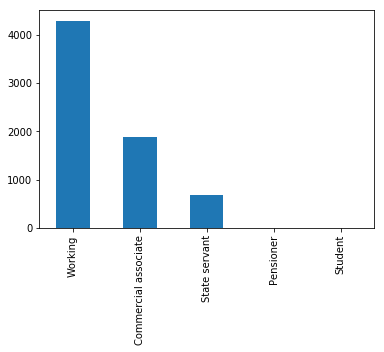

In [85]:
df_occyp['income_type'].value_counts().plot(kind='bar')

In [86]:
df_non_occyp.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       1455
family_size         0
begin_month         0
dtype: int64

In [87]:
test_data=pd.concat([df_non_occyp,df_occyp])

In [88]:
test_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,0,1,0,1,0,inocc,2.0,-60.0
6,26463,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,NaN,2.0,-1.0
7,26464,F,N,Y,0,141750.0,Pensioner,Higher education,Married,House / apartment,-20345,0,1,0,1,0,inocc,2.0,-10.0
8,26465,F,N,N,0,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19316,-4451,1,1,1,0,NaN,1.0,-23.0
10,26467,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21056,0,1,0,1,0,inocc,1.0,-47.0


In [89]:
label_encoder=preprocessing.LabelEncoder()
test_data['gender'] = test_data['gender'].replace(['F','M'],[0,1])
test_data['car'] = test_data['car'].replace(['N','Y'],[0,1])
test_data['reality'] = test_data['reality'].replace(['N','Y'],[0,1])
test_data['income_type']=label_encoder.fit_transform(test_data['income_type'])
#################################################################
test_data['edu_type']=label_encoder.fit_transform(test_data['edu_type'])
########################################################################
test_data['family_type']=label_encoder.fit_transform(test_data['family_type'])

In [90]:
########################################################################
test_data['house_type']=label_encoder.fit_transform(test_data['house_type'])
########################################################################

In [91]:
test_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,0,1,0,1,0,inocc,2.0,-60.0
6,26463,0,0,1,0,585000.0,0,4,1,1,-18858,-2010,1,0,1,0,NaN,2.0,-1.0
7,26464,0,0,1,0,141750.0,1,1,1,1,-20345,0,1,0,1,0,inocc,2.0,-10.0
8,26465,0,0,0,0,225000.0,4,4,3,1,-19316,-4451,1,1,1,0,NaN,1.0,-23.0
10,26467,0,0,1,0,90000.0,1,4,4,1,-21056,0,1,0,1,0,inocc,1.0,-47.0


In [92]:
null_data_t=test_data.loc[test_data['occyp_type'].isnull()]
fill_data_t=test_data.dropna()

In [93]:
null_data_t.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
6,26463,0,0,1,0,585000.0,0,4,1,1,-18858,-2010,1,0,1,0,NaN,2.0,-1.0
8,26465,0,0,0,0,225000.0,4,4,3,1,-19316,-4451,1,1,1,0,NaN,1.0,-23.0
38,26495,1,1,0,1,225000.0,4,4,3,1,-13902,-1589,1,0,1,0,NaN,2.0,-21.0
53,26510,0,0,1,0,112500.0,0,1,1,1,-17472,-1202,1,1,1,0,NaN,2.0,-48.0
56,26513,1,1,1,0,90000.0,4,4,1,5,-11176,-3079,1,1,0,0,NaN,2.0,-44.0


In [94]:
fill_data_t.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,0,1,0,1,0,inocc,2.0,-60.0
7,26464,0,0,1,0,141750.0,1,1,1,1,-20345,0,1,0,1,0,inocc,2.0,-10.0
10,26467,0,0,1,0,90000.0,1,4,4,1,-21056,0,1,0,1,0,inocc,1.0,-47.0
13,26470,0,0,1,0,90000.0,1,4,2,1,-21299,0,1,0,0,0,inocc,1.0,-44.0
14,26471,0,0,1,0,202500.0,1,4,1,1,-22936,0,1,0,0,0,inocc,2.0,-55.0


In [95]:
test_data.shape

(10000, 19)

In [96]:
print(fill_data_t.shape,null_data_t.shape)

(8545, 19) (1455, 19)


In [97]:
fill_data_t['occyp_type_l']=label_encoder.fit_transform(fill_data_t['occyp_type'])

In [98]:
fill_data_t.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'occyp_type_l'],
      dtype='object')

In [99]:
lin_reg = linear_model.LinearRegression()
x=fill_data_t[fill_data_t.columns.drop(['index','occyp_type','occyp_type_l'])]
#employeed(0,1)을 넣지 않고 days_employed에서 양수값을 0으로 처리한 상태에서 재시도
#라벨링한 occyp_type_l는 종속변수로 사용
y=fill_data_t['occyp_type_l']#라벨링 상태
lin_reg_model = lin_reg.fit(x, y)

In [100]:
x.shape

(8545, 17)

In [101]:
null_data_t.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month'],
      dtype='object')

In [102]:
x_test=null_data_t[null_data_t.columns.drop(['index','occyp_type'])]
y_test=null_data_t['occyp_type']
y_test=lin_reg.predict(x_test)#결측치가 있는 데이터에 대입
null_data_t['occyp_type']=y_test

In [103]:
null_data_t.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
6,26463,0,0,1,0,585000.0,0,4,1,1,-18858,-2010,1,0,1,0,12.543801,2.0,-1.0
8,26465,0,0,0,0,225000.0,4,4,3,1,-19316,-4451,1,1,1,0,8.721262,1.0,-23.0
38,26495,1,1,0,1,225000.0,4,4,3,1,-13902,-1589,1,0,1,0,8.338820,2.0,-21.0
53,26510,0,0,1,0,112500.0,0,1,1,1,-17472,-1202,1,1,1,0,11.187210,2.0,-48.0
56,26513,1,1,1,0,90000.0,4,4,1,5,-11176,-3079,1,1,0,0,4.401830,2.0,-44.0


In [104]:
fill_data_t['occyp_type'].value_counts()

Laborers                 1699
inocc                    1697
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
Medicine staff            343
High skill tech staff     343
Accountants               339
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Secretaries                54
Waiters/barmen staff       50
Low-skill Laborers         48
HR staff                   23
IT staff                   19
Realty agents              16
Name: occyp_type, dtype: int64

In [105]:
fill_data_t['occyp_type_l'].value_counts()

8     1699
18    1697
14     946
3      945
10     845
4      563
11     343
6      343
0      339
2      198
16     168
1      148
12     101
15      54
17      50
9       48
5       23
7       19
13      16
Name: occyp_type_l, dtype: int64

In [106]:
np.round(y_test,0)

array([13.,  9.,  8., ...,  6.,  6., 12.])

In [107]:
null_data_t['occyp_type']=np.round(null_data_t['occyp_type'],0)

In [108]:
null_data_t['occyp_type'].describe() #3이 최소 16이 최대

count    1455.000000
mean        8.526460
std         2.367061
min         3.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        16.000000
Name: occyp_type, dtype: float64

In [109]:
null_data_t['occyp_type'].value_counts()

9.0     241
7.0     222
8.0     209
6.0     196
11.0    154
10.0    143
12.0     93
5.0      87
4.0      35
13.0     33
14.0     30
15.0      8
16.0      3
3.0       1
Name: occyp_type, dtype: int64

In [110]:
fill_data_t['occyp_type'].unique()

array(['inocc', 'Core staff', 'Laborers', 'Drivers', 'Managers',
       'Sales staff', 'Cleaning staff', 'Accountants', 'Cooking staff',
       'Medicine staff', 'Realty agents', 'Waiters/barmen staff',
       'Private service staff', 'High skill tech staff',
       'Low-skill Laborers', 'Security staff', 'Secretaries', 'HR staff',
       'IT staff'], dtype=object)

In [111]:
fill_data_t['occyp_type_l'].unique()

array([18,  3,  8,  4, 10, 14,  1,  0,  2, 11, 13, 17, 12,  6,  9, 16, 15,
        5,  7], dtype=int64)

In [112]:
null_data_t.loc[null_data_t['occyp_type']==16.0,'occyp_type']='Security staff'
null_data_t.loc[null_data_t['occyp_type']==3.0,'occyp_type']='Core staff'
null_data_t.loc[null_data_t['occyp_type']==4.0,'occyp_type']='Drivers'
null_data_t.loc[null_data_t['occyp_type']==5.0,'occyp_type']='HR staff'
null_data_t.loc[null_data_t['occyp_type']==6.0,'occyp_type']='High skill tech staff'
null_data_t.loc[null_data_t['occyp_type']==7.0,'occyp_type']='IT staff'
null_data_t.loc[null_data_t['occyp_type']==8.0,'occyp_type']='Laborers'
null_data_t.loc[null_data_t['occyp_type']==9.0,'occyp_type']='Low-skill Laborers'
null_data_t.loc[null_data_t['occyp_type']==10.0,'occyp_type']='Managers'
null_data_t.loc[null_data_t['occyp_type']==11.0,'occyp_type']='Medicine staff'
null_data_t.loc[null_data_t['occyp_type']==12.0,'occyp_type']='Private service staff'
null_data_t.loc[null_data_t['occyp_type']==13.0,'occyp_type']='Realty agents'
null_data_t.loc[null_data_t['occyp_type']==14.0,'occyp_type']='Sales staff'
null_data_t.loc[null_data_t['occyp_type']==15.0,'occyp_type']='Secretaries'

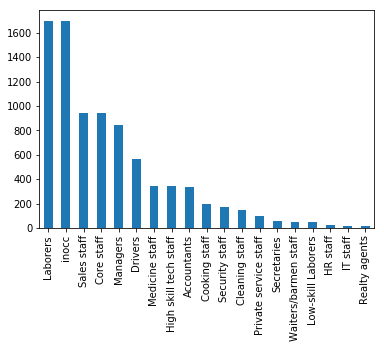

In [113]:
fill_data_t['occyp_type'].value_counts().plot(kind='bar')

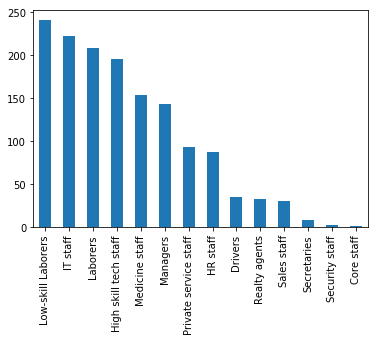

In [114]:
null_data_t['occyp_type'].value_counts().plot(kind='bar')

In [115]:
fill_data_t=fill_data_t.drop('occyp_type_l',axis=1)

In [116]:
df_t=pd.concat([null_data_t,fill_data_t]).sort_values(by='index')
df_t.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,0,1,0,1,0,inocc,2.0,-60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


## 모델링

In [117]:
data=df.copy()
data=data.drop('employeed',axis=1)
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,Laborers,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [118]:
data['occyp_type']=label_encoder.fit_transform(data['occyp_type'])
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,8,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,8,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,10,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,14,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,10,2.0,-26.0,2.0


In [119]:
train_x=data.drop(['credit','index'],axis=1)
train_y=data[['credit']]
print(train_x.shape,train_y.shape)

(26457, 18) (26457, 1)


In [120]:
train_x.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,8,2.0,-6.0
1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,8,3.0,-5.0
2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,10,2.0,-22.0
3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,14,2.0,-37.0
4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,10,2.0,-26.0


In [121]:
test_x=df_t.copy()

In [122]:
test_x['occyp_type']=label_encoder.fit_transform(test_x['occyp_type'])
test_x.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,0,1,0,1,0,18,2.0,-60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,3,2.0,-36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,-15887,-217,1,1,1,0,8,2.0,-40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,-19270,-2531,1,1,0,0,4,2.0,-41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,-17822,-9385,1,1,0,0,10,2.0,-8.0


In [123]:
test_x=test_x.drop('index',axis=1)
test_x.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,1,0,0,112500.0,1,4,0,1,-21990,0,1,0,1,0,18,2.0,-60.0
1,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,3,2.0,-36.0
2,0,0,1,0,69372.0,4,4,1,1,-15887,-217,1,1,1,0,8,2.0,-40.0
3,1,1,0,0,112500.0,0,4,1,1,-19270,-2531,1,1,0,0,4,2.0,-41.0
4,0,1,1,0,225000.0,2,1,1,1,-17822,-9385,1,1,0,0,10,2.0,-8.0


In [124]:
print(train_x.shape,test_x.shape,train_y.shape)

(26457, 18) (10000, 18) (26457, 1)


In [125]:
#변경된 테스트셋 저장
train_x.to_csv('train_x.csv')#index,credit 제외
test_x.to_csv('test_x.csv')#index 제외
train_y.to_csv('train_y.csv')

### Xgboost

In [188]:
sc = StandardScaler()#표준화
x_train_df=train_x.copy()
#y_train_df=train_y.copy()
# X=x_train_df
#Y=y_train_df.values
x_train = sc.fit_transform(x_train_df)

In [197]:
x_train

array([[-0.70356176, -0.78246318, -1.43762552, ..., -0.28104931,
        -0.21473529,  1.21523077],
       [-0.70356176, -0.78246318,  0.69559144, ..., -0.28104931,
         0.87613484,  1.27562003],
       [ 1.42133933,  1.27801541,  0.69559144, ...,  0.09429314,
        -0.21473529,  0.24900268],
       ...,
       [-0.70356176,  1.27801541, -1.43762552, ..., -1.21940543,
        -0.21473529,  0.06783491],
       [ 1.42133933, -0.78246318,  0.69559144, ..., -0.28104931,
        -1.30560543, -1.98539978],
       [-0.70356176, -0.78246318, -1.43762552, ...,  1.22032048,
        -0.21473529,  1.034063  ]])

In [190]:
x_test=test_x.copy()
# x_test=x_test.values
x_test=sc.transform(x_test)

In [193]:
x_test[0]

array([ 1.42133933,  1.27801541, -1.43762552, -0.5735993 , -0.73428677,
       -0.80349087,  0.67264734, -1.43543237, -0.29633138, -1.43566162,
        0.92761212,  0.        , -0.53841734,  1.54869577, -0.31693724,
        1.59566293, -0.21473529, -2.04578904])

In [198]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

### 표준화

In [155]:
X_train, X_val, y_train, y_val = train_test_split(x_train, train_y, 
                                                    stratify=train_y, test_size=0.25)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

xgb=XGBClassifier(n_estimators=1000)
xgb.fit(x_train,train_y)

y_pred=xgb.predict_proba(X_val) 

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


log_loss: 0.6630581793377425


In [159]:
import xgboost as xgb

In [212]:
#xgboost(표준화)
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
        
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(x_train, train_y)):
    X_train, X_val = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
#     xgb=XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)    
    dtrain=xgb.DMatrix(data=X_train,label=y_train)
    dtest=xgb.DMatrix(data=X_val,label=y_val)
    params={'booster':'dart',
           'learning_rate':0.1,
           'objective': 'multi:softprob',
            'num_class': 3,
           'metric': 'multi_logloss'}
    #predictions = xgb.predict_proba(X_val)
    num_round=50
    bst=xgb.train(params,dtrain,
                evals=[(dtrain,'train'),(dtest,'test')],
                verbose_eval=200,
                 num_boost_round=400,
                 early_stopping_rounds=100)
    predictions=bst.predict(dtest)
    y_val_onehot = pd.get_dummies(y_val)
    sub += bst.predict(xgb.DMatrix(x_test))
    #sub += xgb.predict_proba(x_test)
    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)
    
sub = sub / 5
xg_sc_logloss=np.mean(outcomes)
print(xg_sc_logloss) 

[0]	train-merror:0.30215	test-merror:0.312547
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[200]	train-merror:0.260902	test-merror:0.301209
[399]	train-merror:0.215119	test-merror:0.29743
[0]	train-merror:0.303851	test-merror:0.307634
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[200]	train-merror:0.263359	test-merror:0.29743
[399]	train-merror:0.212757	test-merror:0.291761
[0]	train-merror:0.303269	test-merror:0.311094
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[200]	train-merror:0.259709	test-merror:0.297486
[399]	train-merror:0.210054	test-merror:0.288036
[0]	train-merror:0.303458	test-merror:0.309582
Multiple eval metrics have been passed: 'test-merror' will be used for early 

In [213]:
print(np.mean(outcomes))

0.7365421052747283


### 표준화x

In [207]:
#xgboost(표준화x)
import time
time_starts=time.time()
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
        
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
#     xgb=XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)
    dtrain=xgb.DMatrix(data=X_train,label=y_train)
    dtest=xgb.DMatrix(data=X_val,label=y_val)
    params={'booster':'dart',
           'learning_rate':0.1,
           'objective': 'multi:softprob',
            'num_class': 3,
           'metric': 'multi_logloss'}
#     predictions = xgb.predict_proba(X_val)
# num_boost_round 만큼 반복하는데 early_stopping_rounds 만큼 성능 향상이 없으면 중단
# early_stopping_rounds를 사용하려면 eval 데이터 셋을 명기해야함
    bst=xgb.train(params,dtrain,
                evals=[(dtrain,'train'),(dtest,'test')],
                verbose_eval=200,
                 num_boost_round=400,
                 early_stopping_rounds=100)
    predictions=bst.predict(dtest)
    y_val_onehot = pd.get_dummies(y_val)
    sub += bst.predict(xgb.DMatrix(test_x))
#     sub += xgb.predict_proba(test_x)
    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)
time_ends=time.time()
sub = sub / 5
xg_sc_logloss=np.mean(outcomes)
print(xg_sc_logloss) 
print('running_time : ',time_ends-time_starts)

[0]	train-merror:0.30215	test-merror:0.312547
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[200]	train-merror:0.260902	test-merror:0.301209
[399]	train-merror:0.215119	test-merror:0.29743
[0]	train-merror:0.303851	test-merror:0.307634
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[200]	train-merror:0.263359	test-merror:0.29743
[399]	train-merror:0.212757	test-merror:0.29195
[0]	train-merror:0.303269	test-merror:0.311094
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[200]	train-merror:0.259709	test-merror:0.297486
[399]	train-merror:0.210054	test-merror:0.288036
[0]	train-merror:0.303458	test-merror:0.309582
Multiple eval metrics have been passed: 'test-merror' will be used for early s

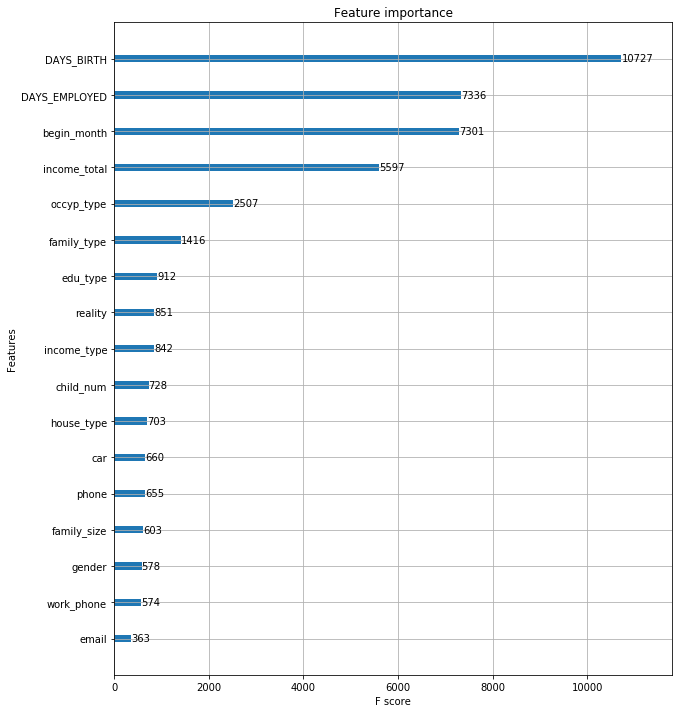

In [211]:
from xgboost import plot_importance
fig,ax=plt.subplots(figsize=(10,12))#표준화하지 않은 상태
plot_importance(bst,ax=ax)
plt.show()

## LightGBM

In [151]:
#표준화x,dart를 넣어서 시도
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,stratify=train_y, test_size=0.25) 
                                                    
print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


lgbm = LGBMClassifier(n_estimators=1000,boosting_type='dart')
lgbm.fit(X_train, y_train)
y_pred=lgbm.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


log_loss: 0.7382765120073803


In [152]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
#lgb에서 dart는 earlystopping이 지원 안됨
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    #lgbm = LGBMClassifier(n_estimators=1000,boosting='dart')
    #lgbm.fit(X_train, y_train)
    lgb_train = lgb.Dataset(X_train,label=y_train,silent=True)
    lgb_test = lgb.Dataset(X_val,label=y_val,silent=True)
    params ={
            'task': 'train',
            'boosting': 'dart',
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'num_class':3,
            'learning_rate': 0.01,
                        }
    reg=lgb.train(params,lgb_train,
                 valid_sets=[lgb_train,lgb_test],
                 valid_names=['train','test'],
                 num_boost_round=3000,
                 verbose_eval=200)
    #predictions = lgbm.predict_proba(X_val)
    #sub += lgbm.predict_proba(x_test)
    sub+=reg.predict(x_test, num_iteration=reg.best_iteration) 
    predictions = reg.predict(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    #sub += lgbm.predict_proba(test_x)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5
   
lg_logloss=np.mean(outcomes)#logloss의 평균
print(lg_logloss)

[200]	train's multi_logloss: 0.87023	test's multi_logloss: 0.879921
[400]	train's multi_logloss: 0.82224	test's multi_logloss: 0.838507
[600]	train's multi_logloss: 0.799379	test's multi_logloss: 0.820587
[800]	train's multi_logloss: 0.784354	test's multi_logloss: 0.810459
[1000]	train's multi_logloss: 0.77081	test's multi_logloss: 0.802381
[1200]	train's multi_logloss: 0.762602	test's multi_logloss: 0.798764
[1400]	train's multi_logloss: 0.751377	test's multi_logloss: 0.792543
[1600]	train's multi_logloss: 0.743467	test's multi_logloss: 0.78906
[1800]	train's multi_logloss: 0.734449	test's multi_logloss: 0.785655
[2000]	train's multi_logloss: 0.727005	test's multi_logloss: 0.782564
[2200]	train's multi_logloss: 0.718255	test's multi_logloss: 0.779215
[2400]	train's multi_logloss: 0.709308	test's multi_logloss: 0.776088
[2600]	train's multi_logloss: 0.703412	test's multi_logloss: 0.774789
[2800]	train's multi_logloss: 0.69886	test's multi_logloss: 0.774009
[3000]	train's multi_logloss:

In [153]:
print(np.mean(outcomes))

0.7668131248767389


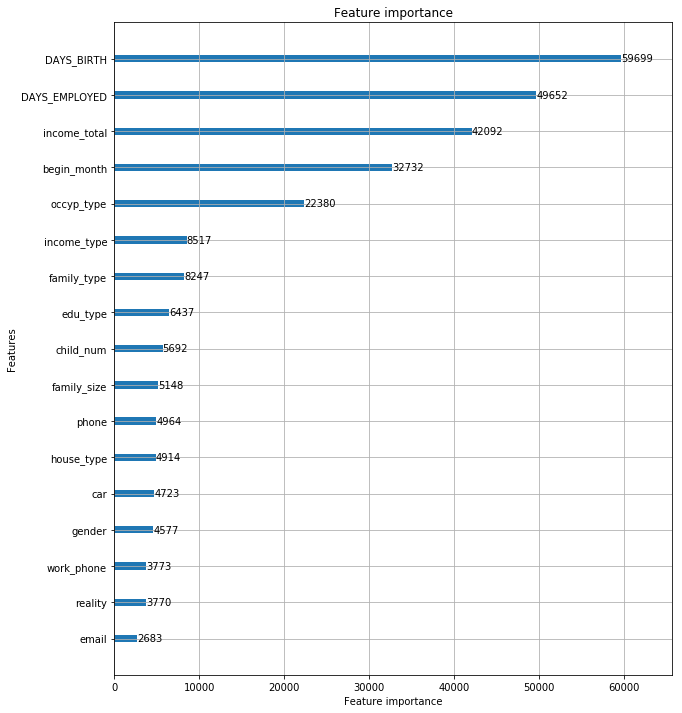

In [154]:
from lightgbm import plot_importance
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(reg,ax=ax)

In [141]:
#표준화 후
X_train, X_val, y_train, y_val = train_test_split(x_train,train_y,stratify=train_y, test_size=0.25) 
                                                    
print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

lgbm = LGBMClassifier(n_estimators=1000,boosting='dart')
lgbm.fit(X_train, y_train)
y_pred=lgbm.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


log_loss: 0.7527404769766467


In [216]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
        
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(x_train,train_y)):
    X_train, X_val = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    #lgbm = LGBMClassifier(n_estimators=1000,boosting='dart')
    #lgbm.fit(X_train, y_train)
    lgb_train = lgb.Dataset(X_train,label=y_train,free_raw_data=False)
    lgb_test = lgb.Dataset(X_val,label=y_val,free_raw_data=False)
    params ={
            'task': 'train',
            'boosting': 'dart',
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'num_class':3,
            'learning_rate': 0.01,
                        }
    reg=lgb.train(params,lgb_train,
                 valid_sets=[lgb_train,lgb_test],
                 valid_names=['train','test'],
                 num_boost_round=3000,
                 verbose_eval=200)
    predictions = reg.predict(X_val,num_iteration=reg.best_iteration)
    y_val_onehot = pd.get_dummies(y_val)

    #sub += lgbm.predict_proba(x_test)
    sub+=reg.predict(x_test, num_iteration=reg.best_iteration) 
    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5

[200]	train's multi_logloss: 0.870412	test's multi_logloss: 0.879798
[400]	train's multi_logloss: 0.821906	test's multi_logloss: 0.838052
[600]	train's multi_logloss: 0.798996	test's multi_logloss: 0.82038
[800]	train's multi_logloss: 0.78355	test's multi_logloss: 0.810192
[1000]	train's multi_logloss: 0.77039	test's multi_logloss: 0.8022
[1200]	train's multi_logloss: 0.762633	test's multi_logloss: 0.798702
[1400]	train's multi_logloss: 0.751523	test's multi_logloss: 0.792648
[1600]	train's multi_logloss: 0.743737	test's multi_logloss: 0.788947
[1800]	train's multi_logloss: 0.734899	test's multi_logloss: 0.7851
[2000]	train's multi_logloss: 0.727556	test's multi_logloss: 0.78248
[2200]	train's multi_logloss: 0.718752	test's multi_logloss: 0.779268
[2400]	train's multi_logloss: 0.70962	test's multi_logloss: 0.776082
[2600]	train's multi_logloss: 0.703765	test's multi_logloss: 0.774049
[2800]	train's multi_logloss: 0.699168	test's multi_logloss: 0.772917
[3000]	train's multi_logloss: 0.6

In [217]:
lg_sc_logloss=np.mean(outcomes)#logloss의 평균

In [218]:
print(lg_sc_logloss)

0.7671981154120762


In [219]:
print(sub)

[[0.09178821 0.17920716 0.72900463]
 [0.14327215 0.15367662 0.70305124]
 [0.10037566 0.17224281 0.72738153]
 ...
 [0.06672992 0.11601318 0.8172569 ]
 [0.09636867 0.20371184 0.69991949]
 [0.10137397 0.21479823 0.6838278 ]]


- XGBOOST(k-fold 기준)
 - 표준화:0.7554255586533906,0.7365421052747283(dart)
 - 표준화x:0.7554281170524562,0.7365633636704965(dart)
- LightGBM(k-fold 기준)
 - 표준화: 0.760487002427386,0.5956217762703959(dart)
 - 표준화x:0.7602560039804878,0.7668131248767389(dart)

#버림:
- XGBoost: 표준화(0.7553833064055759), 비표준화(0.7554024456171665) -nfold 기준
    - dart: 표준화(0.7367790048975029),비표준화(0.7367790048975029)=>똑같이 나옴
- LightGBM: 표준화(0.7606538038198354), 비표준화(0.7607206584935557) -nfold 기준
    - dart : 표준화:0.7670616812789165, 비표준화(0.7678670354566661)

### 변수별 EDA

In [141]:
#중복값 제거 없이 실행
df_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


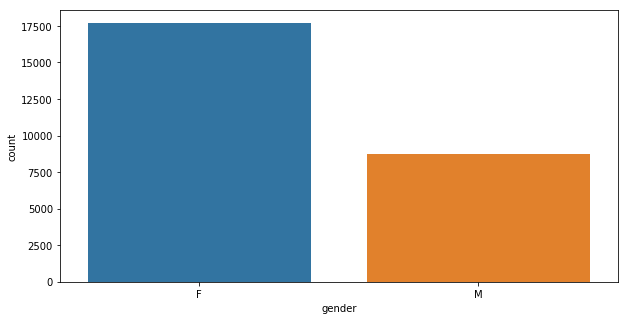

In [142]:
# 성별 분포
plt.figure(figsize=(10,5))
sns.countplot('gender',data=df_train)#여성이 더 많은 편이다.
plt.show()

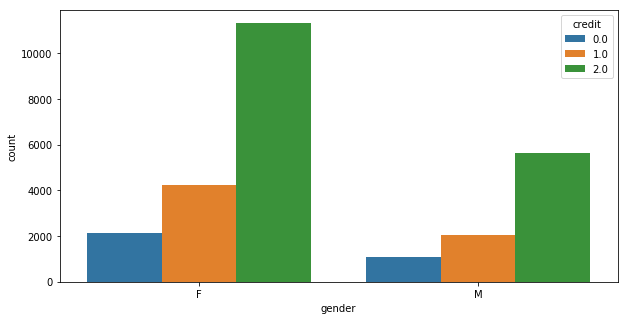

In [143]:
# 성별별 신용도 분포
plt.figure(figsize=(10,5))
sns.countplot('gender',hue='credit',data=df_train)
plt.show()
#남성과 여성 둘 다 2.0대가 높아 신용도가 낮은 편이다.
#하지만 주로 여성에서 많이 나타나는 편이다.

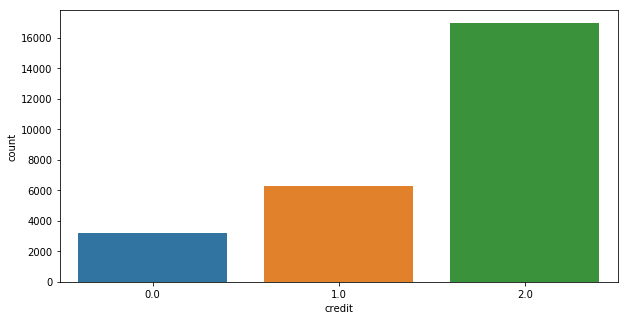

In [144]:
#신용도 그래프
plt.figure(figsize=(10,5))
sns.countplot('credit',data=df_train)
plt.show()
#2.0대 신용도가 많은 것으로 보아 신용도가 낮은 사람들이 많은 것으로 확인된다.

In [145]:
df_train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [146]:
len(df_train)

26457

In [151]:
df_train['gender']=df_train['gender'].replace(['F','M'],[0,1])

In [152]:
df_test['gender']=df_test['gender'].replace(['F','M'],[0,1])

In [153]:
print('gender :')
print(df_train['gender'].value_counts())
print('------------') #여성:0,남성:1

gender :
0    17697
1     8760
Name: gender, dtype: int64
------------


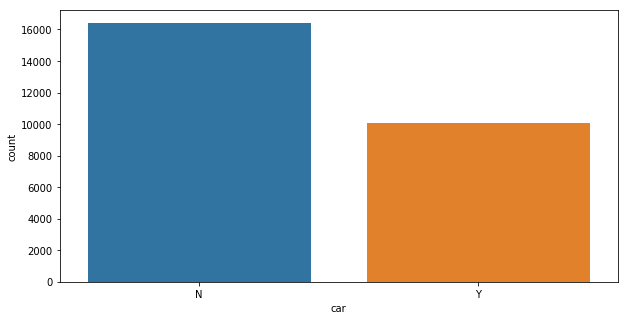

In [154]:
#차량 소지 여부
plt.figure(figsize=(10,5))
sns.countplot('car',data=df_train)
plt.show() #차량 미소지자가 많은 편이다.

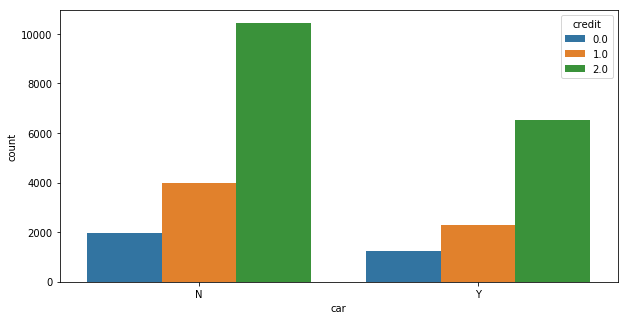

In [155]:
plt.figure(figsize=(10,5)) #차량 소지자별 신용도
sns.countplot('car',hue='credit',data=df_train)
plt.show()
#차를 소유하지 않은 사람들 중에 2.0대가 많은 것으로 보아 신용도가 낮은 사람들 중에서는
#차량을 소지하지 않는 것으로 드러났다.

In [156]:
print('Having a car or not : ')
df_train['car'] = df_train['car'].replace(['N','Y'],[0,1])
df_test['car'] = df_test['car'].replace(['N','Y'],[0,1])
print(df_train['car'].value_counts())
print('--------------')
#차량 소지하지 않은 사람이 많다.

Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------


<Figure size 720x360 with 0 Axes>

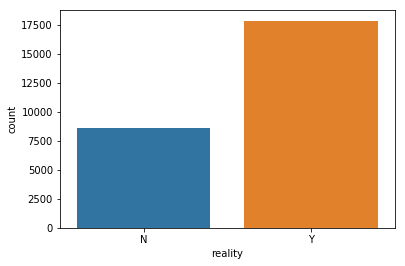

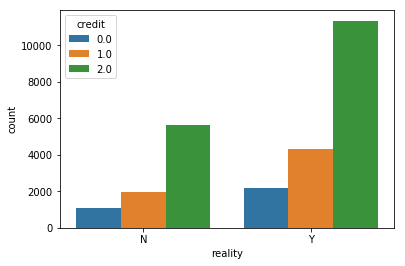

In [157]:
plt.figure(figsize=(10,5))
ax=plt.subplots()
ax=sns.countplot('reality',data=df_train)
ax2=plt.subplots()
ax2=sns.countplot('reality',hue='credit',data=df_train)
#부동산 소유자가 많은 편으로 credit은 2.0으로 갈수록 많다.

In [158]:
print('Having house reality or not: ')
df_train['reality'] = df_train['reality'].replace(['N','Y'],[0,1])
df_test['reality'] = df_test['reality'].replace(['N','Y'],[0,1])
print(df_train['reality'].value_counts())
print('--------------')#부동산 소유자들이 더 많다

Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------


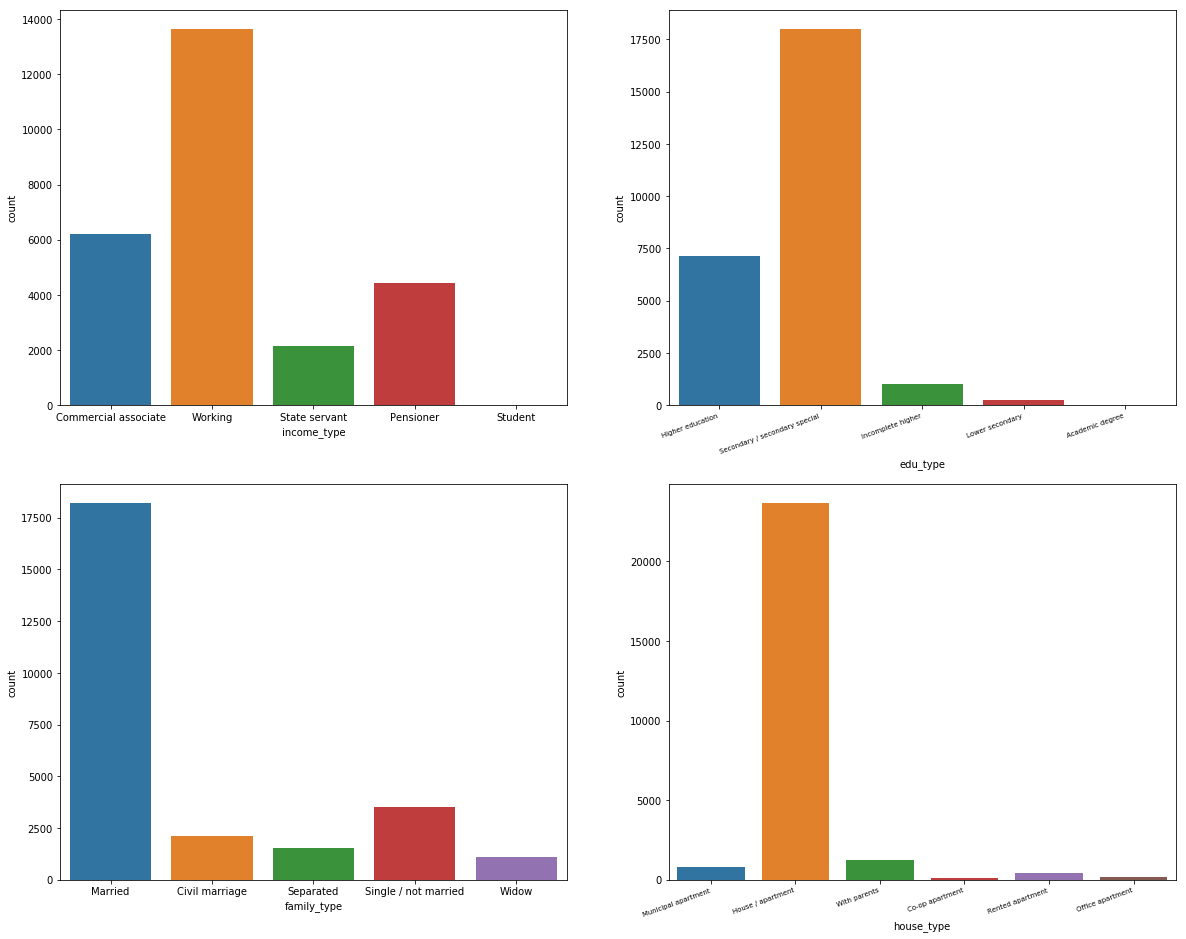

In [159]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,16)
g=sns.countplot(data=df_train, x="income_type",  ax=ax1)
g=sns.countplot(data=df_train, x="edu_type",  ax=ax2)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g=sns.countplot(data=df_train, x="family_type", ax=ax3)
g=sns.countplot(data=df_train, x="house_type",ax=ax4)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
plt.show()

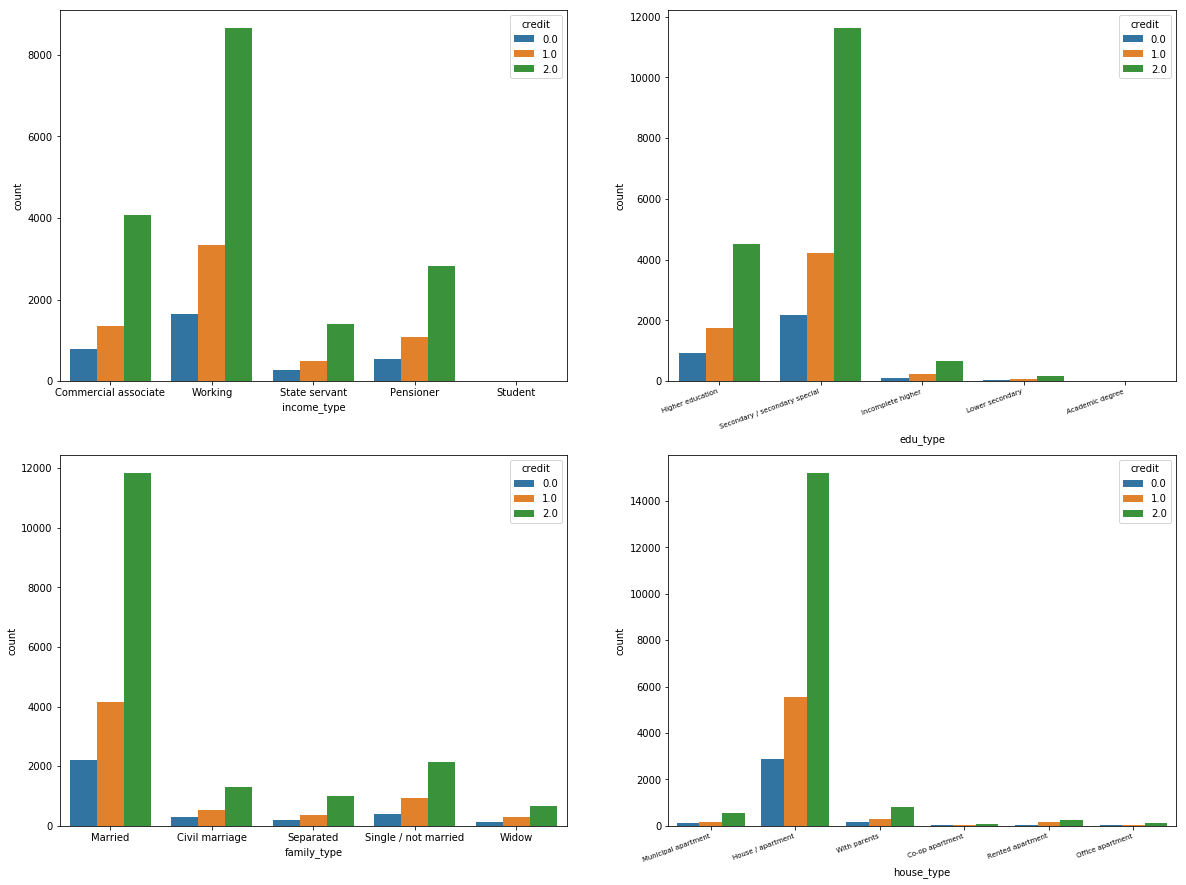

In [160]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,15)
sns.countplot(data=df_train, x="income_type", hue='credit', ax=ax1)
g=sns.countplot(data=df_train, x="edu_type", hue='credit',ax=ax2)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
sns.countplot(data=df_train, x="family_type",hue='credit', ax=ax3)
g=sns.countplot(data=df_train, x="house_type",hue='credit', ax=ax4)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
plt.show()
#회사원,중&고등학생,혼인,아파트에 사는 사람들이 신용도가 낮은 편이다.

In [161]:
print(df_train['income_type'].unique())
print(df_train['edu_type'].unique())
print(df_train['family_type'].unique())
print(df_train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [162]:
#라벨화
label_encoder=preprocessing.LabelEncoder()
df_train['income_type']=label_encoder.fit_transform(df_train['income_type'])
df_test['income_type']=label_encoder.transform(df_test['income_type'])
#################################################################
df_train['edu_type']=label_encoder.fit_transform(df_train['edu_type'])
df_test['edu_type']=label_encoder.transform(df_test['edu_type'])
########################################################################
df_train['family_type']=label_encoder.fit_transform(df_train['family_type'])
df_test['family_type']=label_encoder.transform(df_test['family_type'])
########################################################################
df_train['house_type']=label_encoder.fit_transform(df_train['house_type'])
df_test['house_type']=label_encoder.transform(df_test['house_type'])
########################################################################

In [163]:
df_train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [164]:
df_train['FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

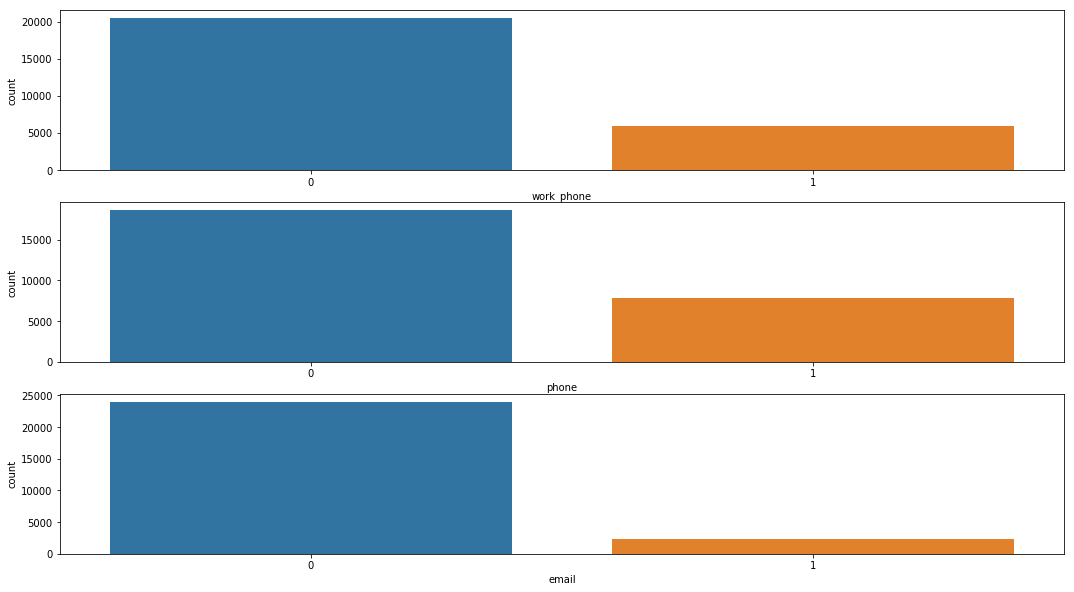

In [165]:
figure,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(18,10)
sns.countplot(data=df_train, x="work_phone", ax=ax1)
sns.countplot(data=df_train, x="phone", ax=ax2)
sns.countplot(data=df_train, x="email", ax=ax3)
plt.show()
#휴대폰 소유를 하고 업무용 전화,전화,이메일 소유는 적은 편이다.

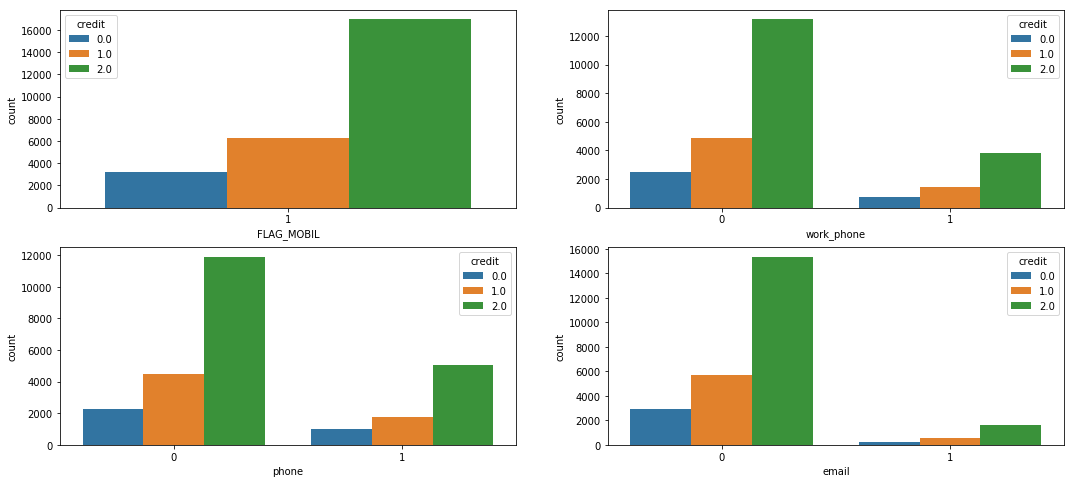

In [166]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(18,8)

sns.countplot(data=df_train, x="FLAG_MOBIL", hue='credit', ax=ax1)
#전원 휴대폰 소지,신용등급 낮은 편
sns.countplot(data=df_train, x="work_phone", hue='credit', ax=ax2)
sns.countplot(data=df_train, x="phone",hue='credit', ax=ax3)
sns.countplot(data=df_train, x="email",hue='credit', ax=ax4)
plt.show()
#업무용 전화 소유 여부가 많고 전화,이메일 소유하지 않은 사람 중에서 신용이 낮은 사람이 많다.

In [167]:
print('Having a phone or not: ')
print(df_train['phone'].value_counts())
print('--------------')
      
print('Having a email or not: ')
print(df_train['email'].value_counts())
print('--------------')
      
print('Having a work phone or not: ')
print(df_train['work_phone'].value_counts())
print('--------------')

Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


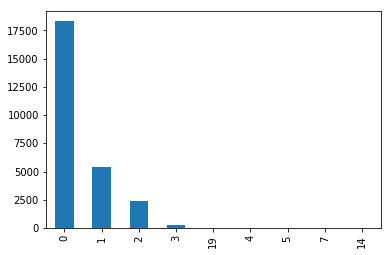

In [168]:
##연속형 변수(자녀 수)
df_train['child_num'].value_counts(sort=False).plot.bar()

In [169]:
#자녀가 2명 이상이면 2로 처리(보류)
df_train.loc[df_train['child_num'] >= 2,'child_num']=2
df_test.loc[df_test['child_num']>=2, 'child_num']=2

In [170]:
print(df_train['child_num'].value_counts())

0    18340
1     5386
2     2731
Name: child_num, dtype: int64


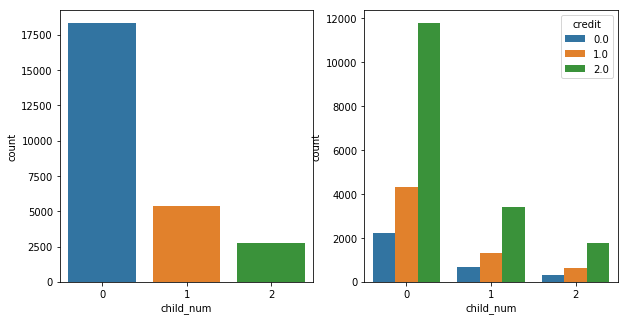

In [171]:
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(10,5)
sns.countplot(data=df_train, x="child_num", ax=ax1)
sns.countplot(data=df_train, x="child_num",hue='credit',ax=ax2)
#자녀가 없는 회원이 제일 많고 그 중에서 신용등급이 제일 낮은 편이다.

In [172]:
plus_month=df_train.loc[df_train['begin_month']>=0]
plus_month['begin_month'].value_counts()
#begin_month은 0이 231임(신용카드 발급 상태 1달도 안됨)

0.0    231
Name: begin_month, dtype: int64

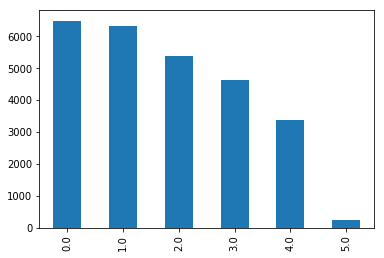

In [175]:
df_train['begin_year']=-df_train['begin_month']//12#신용카드 발급한지 몇년?
df_train['begin_year'].value_counts().plot(kind='bar')
#발급받은지 2년 이내가 많은 편이다.

In [176]:
df_train['begin_year'].value_counts()#4,5를 합치고 5개 구간으로 

0.0    6488
1.0    6322
2.0    5377
3.0    4643
4.0    3392
5.0     235
Name: begin_year, dtype: int64

In [177]:
print(df_train['begin_year'].value_counts(bins=5,sort=False))

(-0.006, 1.0]    12810
(1.0, 2.0]        5377
(2.0, 3.0]        4643
(3.0, 4.0]        3392
(4.0, 5.0]         235
Name: begin_year, dtype: int64


In [179]:
df_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,begin_year
0,0,0,0,0,0,202500.0,0,1,1,2,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,0.0
1,1,0,0,1,1,247500.0,0,4,0,1,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,0.0
2,2,1,1,1,0,450000.0,4,1,1,1,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1.0
3,3,0,0,1,0,202500.0,0,4,1,1,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,3.0
4,4,0,1,1,0,157500.0,2,1,1,1,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,2.0


In [180]:
df_train['age']=-df_train['DAYS_BIRTH']//365

Text(0.5, 0, 'Age')

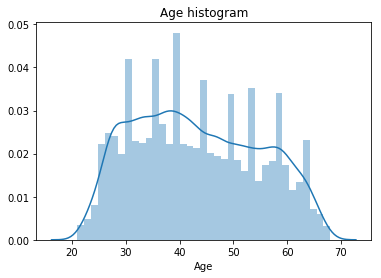

In [181]:
#신용카드를 사용한 사람들의 연령층
ax=plt.subplots()
ax=sns.distplot(df_train['age'],kde=True)
ax.set_title('Age histogram')
ax.set_xlabel('Age')
#20대 초반에서 60대 후반까지 분포한다.

In [182]:
print(df_train['age'].value_counts(bins=5,sort=False))

(20.951999999999998, 30.4]    4324
(30.4, 39.8]                  6869
(39.8, 49.2]                  6769
(49.2, 58.6]                  5152
(58.6, 68.0]                  3343
Name: age, dtype: int64


In [183]:
bins = list(range(20,80,10))
bins_label = [str(x)+"s" for x in bins]
print(bins_label)

['20s', '30s', '40s', '50s', '60s', '70s']


In [184]:
df_train.describe()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,begin_year,age
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,...,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.331103,0.379748,0.673924,0.410024,1.873065e+05,2.394754,3.097592,1.367275,1.279813,...,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560,1.729145,43.213478
std,7637.622372,0.470619,0.485333,0.468784,0.669604,1.018784e+05,1.735900,1.341602,0.952536,0.944273,...,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283,1.383778,11.513590
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,...,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000,0.000000,21.000000
25%,6614.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,...,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000,1.000000,34.000000
50%,13228.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,...,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000,2.000000,42.000000
75%,19842.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,...,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000,3.000000,53.000000
max,26456.000000,1.000000,1.000000,1.000000,2.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,...,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000,5.000000,68.000000


In [185]:
df_train['ages']=pd.cut(df_train['age'],bins, right=False, labels = bins_label[:-1])

In [186]:
df_train['ages'].unique()

[30s, 50s, 40s, 20s, 60s]
Categories (5, object): [20s < 30s < 40s < 50s < 60s]

In [187]:
df_train['ages'].value_counts()

30s    7585
40s    6769
50s    5739
20s    3608
60s    2756
Name: ages, dtype: int64

In [188]:
def make_bin(variable, n):#minus 변경하고 구간화
    df_train[variable]=-df_train[variable]
    df_test[variable]=-df_test[variable]
    count, bin_dividers =np.histogram(df_train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    df_train[variable]=pd.cut(x=df_train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    df_test[variable]=pd.cut(x=df_test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    df_test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    df_train[variable]=label_encoder.fit_transform(df_train[variable])
    df_test[variable]=label_encoder.transform(df_test[variable])

In [190]:
df_train['ages']=label_encoder.fit_transform(df_train['ages'])